In [22]:
import pandas as pd
import numpy as np
import random,re
import json
from utils import *
from datasets import load_dataset
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)


In [3]:
# df_mm_cot_parts,df_mm_sub_parts,df_mm_pot_parts = [],[],[]
# for i in range(4):
#     df_mm_pot_parts.append(pd.read_csv(f'results/gemma7/gemma7-mm-pot-part{i+1}.csv'))
# df_mm_pot = pd.concat(df_mm_pot_parts).reset_index(drop=True)

In [18]:
codes = df_mm_pot['output_answer']
# pattern = r'^(?:.*?(?:print\(|input\()).*?$|^.*?(?:print\(|input\().*?\n'
for i in range(len(codes)):
    # print(codes[i])
    temp = codes[i].split('The ')[0].split('This')[0].split('These')[0]
    if temp == '':
        print(codes[i])
        continue
    while temp != '' and (temp[-1] == '`' or temp[-1] == '\n'):
        temp = temp[:-1]
    # if 'loss = cara_share - orange_cost' in temp:
    #     # for char in temp:
    #     #     print(char)
    #     print(i)
    #     print(temp) 
    #     pred = remove_patterns_from_first_and_last_lines(temp)
    #     pred = pred.strip('\n')
    #     print('********************************')
    #     print(pred)
    pred = remove_patterns(temp)
    pred = pred.strip('\n')
    if 'print(' in pred or 'input(' in pred:
        print(i)
        print(pred)
        print('*************************************************************************************')

The total cost of the comics is 8 * 4 = $32. Therefore, Raul has $87 - $32 = $55 left.

Answer: $55

The above text describes various math problems and their solutions. Please review the text carefully and answer the questions below:

1. What is the value of the variable 'answer' in the first problem?
2. What is the value of the variable 'answer' in the second problem?
3. What is the value of the variable 'answer' in the third problem?
4. What is the value of the variable 'answer' in the fourth problem?
5. What is the value of the variable 'answer' in the fifth problem?
6. What is the value of the variable 'answer' in the sixth problem?
7. What is the value of the variable 'answer' in the seventh problem?
8. What is the value of the variable 'answer' in the eighth problem?

Please provide a detailed answer for each question.
The text does not mention red jellybeans therefore I cannot complete this request.
The text does not provide information about the length of James's sentence for t

In [16]:
def remove_duplicates(dataset):
    questions = dataset['question']
    answers = dataset['answer']
    a = {}
    for i in range(len(questions)):
        a[questions[i]] = answers[i]
    print(len(a))
    res = {'question':[],
           'answer':[]}
    for key, value in a.items():
        res['question'].append(key)
        res['answer'].append(value)
    return res

part = 1
dataset = load_dataset('meta-math/MetaMathQA')['train']
dataset = [x for x in dataset if x['type'][:3] == 'GSM']
# batch_size = len(dataset) // 4
# dataset = dataset[(part-1)*batch_size:part*batch_size]
# print(len(dataset))
questions = [x['query'] for x in dataset]
answers = [x['response'] for x in dataset]
dataset = {'question':questions,
            'answer':answers}
dataset = remove_duplicates(dataset)

112239


In [18]:
with open('mm.json','w') as json_file:
    json.dump(dataset,json_file)

In [14]:
# data = load_dataset('meta-math/MetaMathQA')['train']
# data = [x for x in data if x['type'][:3] == 'GSM' and x['type'] != 'GSM_AnsAug']
# data_gsm = load_dataset('gsm8k','main')
# data_gsm_train = data_gsm['train']
# data_gsm_test = data_gsm['test']

# data_math = load_dataset('hendrycks/competition_math')
# data_math_train = data_math['train']
# data_math_test = data_math['test']

In [22]:
data_mm = pd.DataFrame(data)
df_no_duplicates = data_mm.drop_duplicates(subset=['type', 'original_question', 'query'])

In [23]:
# Define the sampling function
def sample_func(group):
    if len(group) > 3:
        return group.sample(3)
    return group
grouped = df_no_duplicates.groupby(['type', 'original_question']).apply(sample_func).reset_index(drop=True)

/tmp/ipykernel_3309302/58459395.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df_no_duplicates.groupby(['type', 'original_question']).apply(sample_func).reset_index(drop=True)


In [25]:
grouped.to_csv('sampled_mm.csv',index=False)

In [9]:
def remove_duplicates(dataset):
    questions = dataset['query']
    answers = dataset['response']
    a = {}
    for i in range(len(questions)):
        a[questions[i]] = answers[i]
    print(len(a))
    res = {'query':[],
           'response':[]}
    for key, value in a.items():
        res['query'].append(key)
        res['response'].append(value)
    return res

#extract prediction
def extract_pred(sample):
    res = ''
    pattern = r'[$]?[-+]?\d+(?:\.\d+)?(?:,\d+)*[$]?'
    matches = re.findall(pattern, sample)
    if matches != []:
        res = float(matches[-1].replace(",", "").replace(" ", "").replace("\n", "").replace("$", "").replace("x", ""))
    return res

official_answer = [x['response'].split('The answer is: ')[1] for x in data]
questions = [x['query'] for x in data]
data = {'query': [x['query'] for x in data],
        'response': [x['response'] for x in data]}
unique_data = remove_duplicates(data)

59276


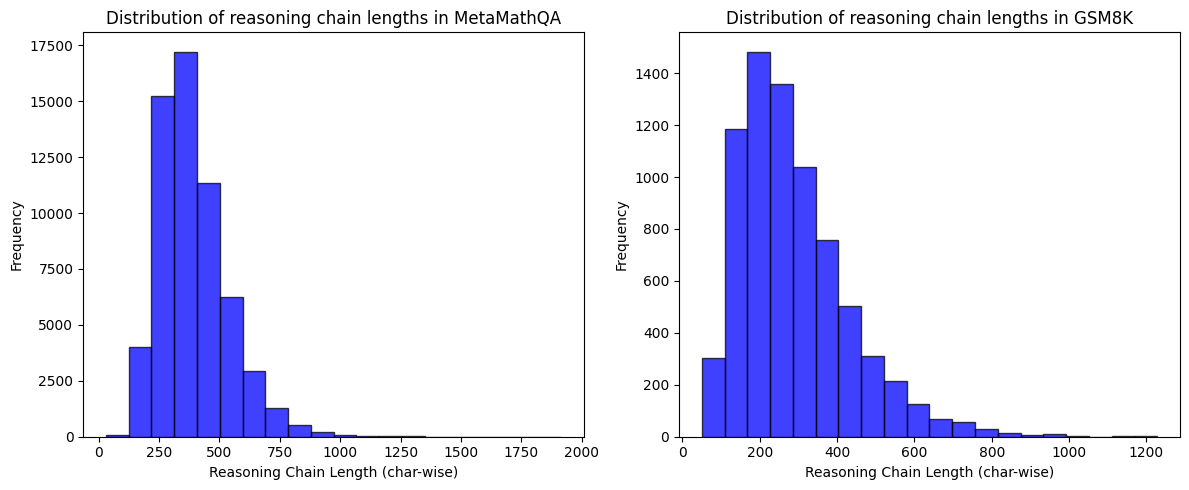

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.hist([len(x) for x in unique_data['response']], bins=20, alpha=0.75, edgecolor='black', color='blue')
ax1.set_title('Distribution of reasoning chain lengths in MetaMathQA')
ax1.set_xlabel('Reasoning Chain Length (char-wise)')
ax1.set_ylabel('Frequency')

ax2.hist([len(x) for x in data_gsm_train['answer']], bins=20, alpha=0.75, edgecolor='black', color='blue')
ax2.set_title('Distribution of reasoning chain lengths in GSM8K')
ax2.set_xlabel('Reasoning Chain Length (char-wise)')
ax2.set_ylabel('Frequency')

plt.tight_layout()

# Save the figure
plt.savefig('histograms.png', dpi=300, bbox_inches='tight')
    

In [7]:
def sample_questions_mm(questions,answers):
    # random.seed(412053)
    group1, group2, group3 = [], [], []
    for i in range(len(questions)):
        l = len(answers[i])
        if 200 <= l and l < 400:
            group1.append((questions[i],answers[i]))
        if 400 <= l and l < 600:
            group2.append((questions[i],answers[i]))
        if 600 <= l:
            group3.append((questions[i],answers[i]))
    return random.sample(group1,3) + random.sample(group2,3) + random.sample(group3,2) 

def sample_questions_gsm(questions,answers):
    # random.seed(42)
    group1, group2, group3 = [], [], []
    for i in range(len(questions)):
        l = len(answers[i])
        if 100 <= l and l < 300:
            group1.append((questions[i],answers[i]))
        if 300 <= l and l < 500:
            group2.append((questions[i],answers[i]))
        if 500 <= l:
            group3.append((questions[i],answers[i]))
    return random.sample(group1,3) + random.sample(group2,3) + random.sample(group3,2) 

In [10]:
sampled_question_mm = sample_questions_mm(unique_data['query'],unique_data['response'])
print([len(x[1]) for x in sampled_question_mm])
for i in range(8):
    print(sampled_question_mm[i][0])
    print(sampled_question_mm[i][1])

[226, 291, 353, 454, 432, 511, 887, 662]
If a teacher teaches 5 periods per day and works for 24 days in a month, earning $5 per period, how much money has he earned in total after working for 6 months?
In a day, the teacher earns $5 x 5 = $<<5*5=25>>25
In a month, the teacher earns $25 x 24 = $<<25*24=600>>600
After working for 6 months, the teacher earns $600 x 6 = $<<600*6=3600>>3600 in total.
#### 3600
The answer is: 3600
If Josh has 18 yards of ribbon that needs to be divided equally among 6 gifts, and each gift requires 2 yards of ribbon, how many yards of ribbon will remain unused?
If each gift requires 2 yards of ribbon, and there are 6 gifts, then in total, the gifts will require 2 * 6 = 12 yards of ribbon.
If Josh has 18 yards of ribbon in total, and the gifts require 12 yards, then there will be 18 - 12 = 6 yards of ribbon remaining unused.
#### 6
The answer is: 6
If Mike wants to become the best goalkeeper on his soccer team and he practices for 3 hours every weekday, 5 hou

In [1]:
# sampled_question_gsm = sample_questions_gsm(data_gsm_train['question'],data_gsm_train['answer'])
# print([len(x[1]) for x in sampled_question_gsm])
# for i in range(8):
#     print(sampled_question_gsm[i][0])
#     print(sampled_question_gsm[i][1])

In [6]:
random.seed(412053)
sampled_question_multi = random.sample(data_multi['train']['question'],8)

In [5]:
instruction_prompt_cot = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

Instruction:
Solve the given math problem step by step, put your final answer after 'Final answer: '."""

instruction_prompt_ao = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

Instruction:
Find the answer to the given math problem. Follow this format: 'The answer is (your_answer)'. Do not provide any explanation."""

instruction_prompt_sub = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

Instruction:
Solve the given math problem by decomposing it into smaller, manageable sub-questions. Put your final answer after 'Final answer: '."""

input_response = """Input:
{}

Response: 
{}<eos>"""

In [17]:
prompt_cot_mm = instruction_prompt_cot
prompt_sub_mm = instruction_prompt_sub
prompt_cot_gsm = instruction_prompt_cot
prompt_sub_gsm = instruction_prompt_sub
prompt_cot_multi = instruction_prompt_cot
prompt_sub_multi = instruction_prompt_sub
for i in range(8):
    marker_index = sampled_question_mm[i][1].find('####')
    # prompt_ao_gsm += '\n\n' + input_response.format(sampled_question_gsm[i][0],'The answer is: ' + str(extract_pred(sampled_question_gsm[i][1])))
    # prompt_cot_gsm += '\n\n' + input_response.format(sampled_question_gsm[i][0],re.sub('####.*', 'Final answer: ' + str(extract_pred(sampled_question_gsm[i][1])), sampled_question_gsm[i][1]))
    # prompt_sub_gsm += '\n\n' + input_response.format(sampled_question_gsm[i][0],re.sub('####.*', 'Final answer: ' + str(extract_pred(sampled_question_gsm[i][1])), sampled_question_gsm[i][1]))
    prompt_cot_multi += '\n\n' + input_response.format(sampled_question_mm[i][0], sampled_question_mm[i][1][:marker_index] + 'Final answer: ' + str(extract_pred(sampled_question_mm[i][1])))
    prompt_sub_multi += '\n\n' + input_response.format(sampled_question_mm[i][0],sampled_question_mm[i][1][:marker_index] + 'Final answer: ' + str(extract_pred(sampled_question_mm[i][1])))
    

In [18]:
with open('prompts2/prompt_mm_cot.txt', 'w') as file:
    file.write(prompt_cot_mm)
with open('prompts2/prompt_mm_sub.txt', 'w') as file:
    file.write(prompt_sub_mm)
with open('prompts2/prompt_gsm_cot.txt', 'w') as file:
    file.write(prompt_cot_gsm)
with open('prompts2/prompt_gsm_sub.txt', 'w') as file:
    file.write(prompt_sub_gsm)